<a href="https://colab.research.google.com/github/Iman6243/AI/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

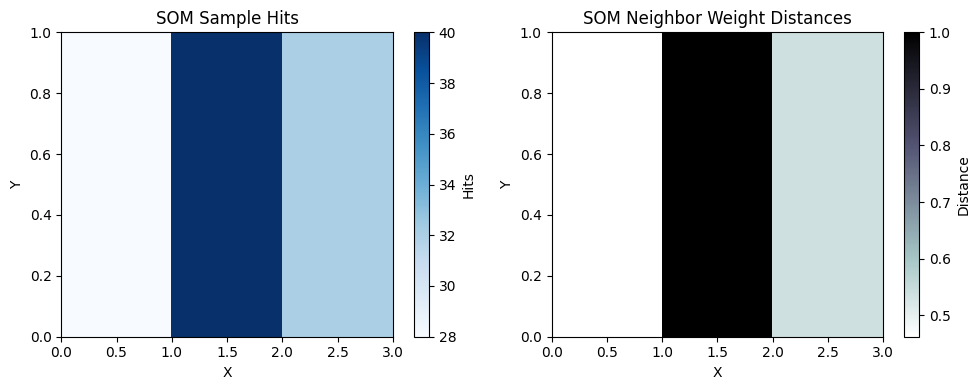

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# تولید داده‌های نمونه (در صورت نیاز به داده‌های واقعی، داده‌های خود را وارد کنید)
data = np.random.rand(100, 3)  # 100 نمونه با 3 ویژگی

# تنظیمات SOM
som_size = (3, 1)  # اندازه شبکه SOM (3x1) برای تطابق با شکل

# ساخت و آموزش SOM
som = MiniSom(x=som_size[0], y=som_size[1], input_len=data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 100)  # تعداد تکرارهای آموزشی

# ترسیم تعداد ضربه‌ها (Hits) برای شکل 10a
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
frequencies = som.activation_response(data)
plt.title('SOM Sample Hits')
plt.pcolor(frequencies.T, cmap='Blues')  # مقدار ضربه‌ها
plt.colorbar(label='Hits')
plt.xlabel('X')
plt.ylabel('Y')

# ترسیم فاصله‌های وزنی همسایگان برای شکل 10b
plt.subplot(1, 2, 2)
plt.title('SOM Neighbor Weight Distances')
plt.pcolor(som.distance_map().T, cmap='bone_r')  # فاصله‌های وزنی همسایگان
plt.colorbar(label='Distance')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()


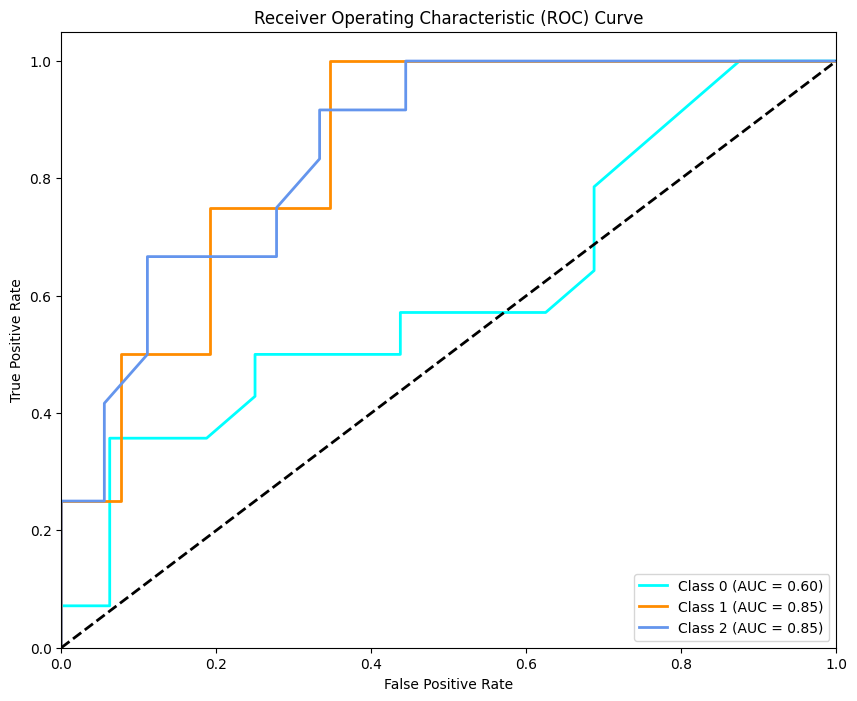

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# تولید داده‌های نمونه
X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_classes=3, random_state=42)

# جداسازی داده‌ها به مجموعه آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# مدل طبقه‌بندی
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# باینری‌سازی برچسب‌ها
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = classifier.predict_proba(X_test)

# محاسبه منحنی ROC و AUC برای هر کلاس
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# محاسبه میانگین منحنی ROC و AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ترسیم منحنی ROC برای هر کلاس
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
